In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


Masukkan nilai kedisiplinan (0-100): 79
Masukkan nilai prestasi (0-100): 82
Masukkan nilai visi misi (0-100): 83
Rekomendasi kelayakan calon ketua OSIS: 61.11


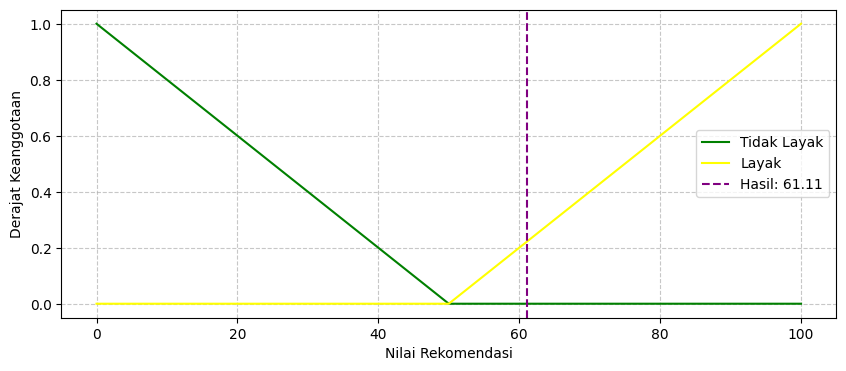

In [ ]:
# @title 1. Buatlah Code Program Fuzzy Tsukamoto pada suatu kasus yang ditetapkan. Judul: Sistem Pendukung Keputusan Untuk Penentuan Pemilihan Ketua OSIS Dengan Menggunakan Metode Fuzzy Tsukamoto

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Mendefinisikan rentang untuk variabel
kedisiplinan = np.arange(0, 101, 1)
prestasi = np.arange(0, 101, 1)
visi_misi = np.arange(0, 101, 1)
hasil = np.arange(0, 101, 1)

# Fungsi keanggotaan untuk variabel input
kedisiplinan_level_buruk = fuzz.trimf(kedisiplinan, [0, 0, 50])
kedisiplinan_level_cukup = fuzz.trimf(kedisiplinan, [30, 50, 70])
kedisiplinan_level_baik = fuzz.trimf(kedisiplinan, [50, 100, 100])

prestasi_level_sangat_rendah = fuzz.trimf(prestasi, [0, 0, 40])
prestasi_level_rendah = fuzz.trimf(prestasi, [25, 40, 55])
prestasi_level_sedang = fuzz.trimf(prestasi, [40, 55, 70])
prestasi_level_tinggi = fuzz.trimf(prestasi, [55, 70, 85])
prestasi_level_sangat_tinggi = fuzz.trimf(prestasi, [70, 100, 100])

visi_misi_level_buruk = fuzz.trimf(visi_misi, [0, 0, 50])
visi_misi_level_cukup = fuzz.trimf(visi_misi, [30, 50, 70])
visi_misi_level_baik = fuzz.trimf(visi_misi, [50, 100, 100])

# Fungsi keanggotaan untuk variabel output
hasil_tidak_layak = fuzz.trimf(hasil, [0, 0, 50])
hasil_layak = fuzz.trimf(hasil, [50, 100, 100])

# Input dari pengguna
input_kedisiplinan = float(input("Masukkan nilai kedisiplinan (0-100): "))
input_prestasi = float(input("Masukkan nilai prestasi (0-100): "))
input_visi_misi = float(input("Masukkan nilai visi misi (0-100): "))

# Fuzzifikasi - derajat keanggotaan masing-masing input
kedisiplinan_level_buruk = fuzz.interp_membership(kedisiplinan, kedisiplinan_level_buruk, input_kedisiplinan)
kedisiplinan_level_cukup = fuzz.interp_membership(kedisiplinan, kedisiplinan_level_cukup, input_kedisiplinan)
kedisiplinan_level_baik = fuzz.interp_membership(kedisiplinan, kedisiplinan_level_baik, input_kedisiplinan)

prestasi_level_sangat_rendah = fuzz.interp_membership(prestasi, prestasi_level_sangat_rendah, input_prestasi)
prestasi_level_rendah = fuzz.interp_membership(prestasi, prestasi_level_rendah, input_prestasi)
prestasi_level_sedang = fuzz.interp_membership(prestasi, prestasi_level_sedang, input_prestasi)
prestasi_level_tinggi = fuzz.interp_membership(prestasi, prestasi_level_tinggi, input_prestasi)
prestasi_level_sangat_tinggi = fuzz.interp_membership(prestasi, prestasi_level_sangat_tinggi, input_prestasi)

visi_misi_level_buruk = fuzz.interp_membership(visi_misi, visi_misi_level_buruk, input_visi_misi)
visi_misi_level_cukup = fuzz.interp_membership(visi_misi, visi_misi_level_cukup, input_visi_misi)
visi_misi_level_baik = fuzz.interp_membership(visi_misi, visi_misi_level_baik, input_visi_misi)

# Menentukan kekuatan aturan dan hasil defuzzifikasi
rule_strengths = []
rule_outputs = []

# Menambahkan semua aturan (rules)
for i in range(1, 46):
    locals()[f"rule{i}_strength"] = np.minimum(np.minimum(
        locals()[f"kedisiplinan_level_{['buruk', 'cukup', 'baik'][((i-1)//15)%3]}"],
        locals()[f"prestasi_level_{['sangat_rendah', 'rendah', 'sedang', 'tinggi', 'sangat_tinggi'][(i-1)%5]}"]),
        locals()[f"visi_misi_level_{['buruk', 'cukup', 'baik'][((i-1)//5)%3]}"])

    locals()[f"rule{i}_output"] = fuzz.defuzz(
        hasil,
        hasil_layak if i in {26, 27, 29, 30, 38, 39, 41, 42, 45} else hasil_tidak_layak,
        'centroid'
    )

    rule_strengths.append(locals()[f"rule{i}_strength"])
    rule_outputs.append(locals()[f"rule{i}_output"])

# Menghitung pembilang dan penyebut untuk defuzzifikasi akhir dengan semua aturan
numerator = np.sum(np.multiply(rule_strengths, rule_outputs))
denominator = np.sum(rule_strengths)

final_decision = numerator / denominator if denominator != 0 else 0

# Menampilkan hasil
print(f"Rekomendasi kelayakan calon ketua OSIS: {final_decision:.2f}")

# Visualisasi hasil
plt.figure(figsize=(10, 4))
plt.plot(hasil, hasil_tidak_layak, label='Tidak Layak', color='green')
plt.plot(hasil, hasil_layak, label='Layak', color='yellow')
plt.axvline(x=final_decision, color='purple', linestyle='--', label=f'Hasil: {final_decision:.2f}')
plt.xlabel("Nilai Rekomendasi")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Referensi : https://drive.google.com/file/d/1upKe3LJnmIEwME6rBP7kMpLTMrnrpVe1/view?usp=sharing

Masukkan nilai kualitas makanan (0-10): 5.5
Masukkan nilai kualitas pelayanan (0-10): 5.5
Masukkan nilai kualitas harga (0-10): 5.5


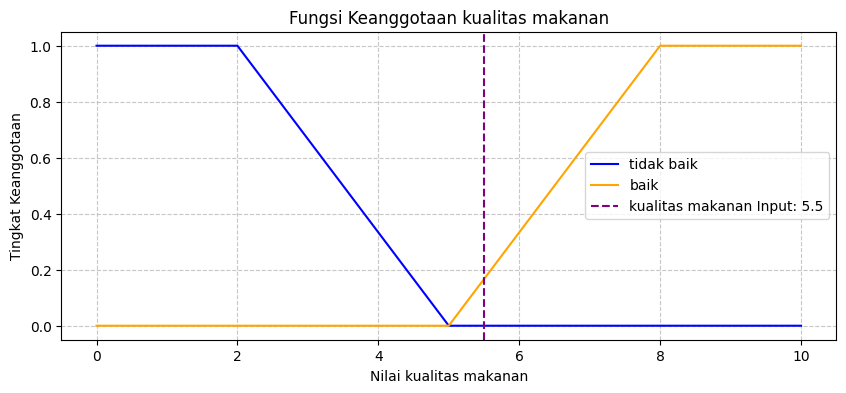

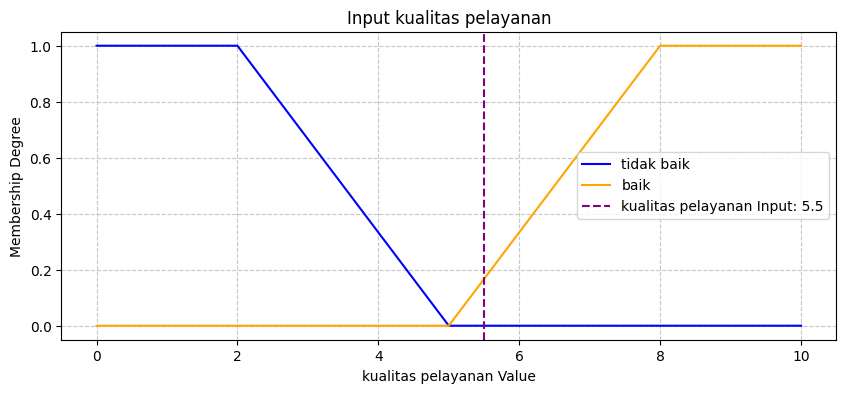

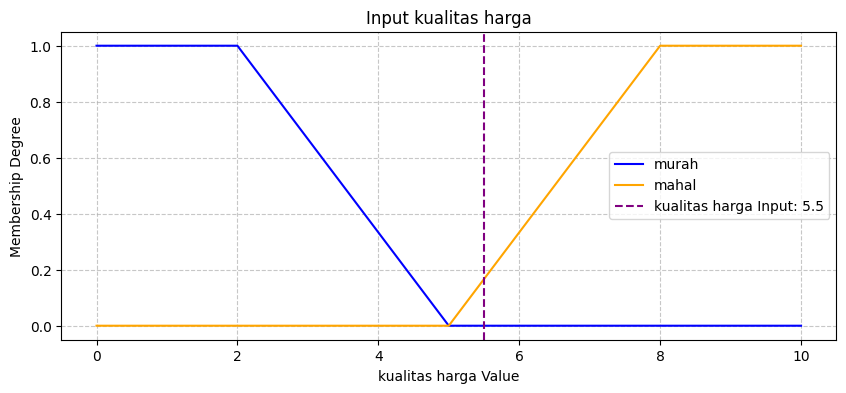

Fuzzifikasi kualitas makanan: 0.00, 0.17
Fuzzifikasi kualitas pelayanan: 0.00, 0.00
Fuzzifikasi kualitas harga: 0.17, 0.00
Aturan 1: IF Profit is (kualitas_makanan[tidak_baik] AND kualitas_pelayanan[tidak_baik]) AND kualitas_harga[mahal] THEN Devision is [tingkat_kepuasan[tidak_puas]]
Aturan 2: IF Profit is (kualitas_makanan[tidak_baik] AND kualitas_pelayanan[tidak_baik]) AND kualitas_harga[murah] THEN Devision is [tingkat_kepuasan[tidak_puas]]
Aturan 3: IF Profit is (kualitas_makanan[tidak_baik] AND kualitas_pelayanan[baik]) AND kualitas_harga[mahal] THEN Devision is [tingkat_kepuasan[tidak_puas]]
Aturan 4: IF Profit is (kualitas_makanan[tidak_baik] AND kualitas_pelayanan[baik]) AND kualitas_harga[murah] THEN Devision is [tingkat_kepuasan[puas]]
Aturan 5: IF Profit is (kualitas_makanan[baik] AND kualitas_pelayanan[baik]) AND kualitas_harga[mahal] THEN Devision is [tingkat_kepuasan[puas]]
Aturan 6: IF Profit is (kualitas_makanan[baik] AND kualitas_pelayanan[baik]) AND kualitas_harga[mu

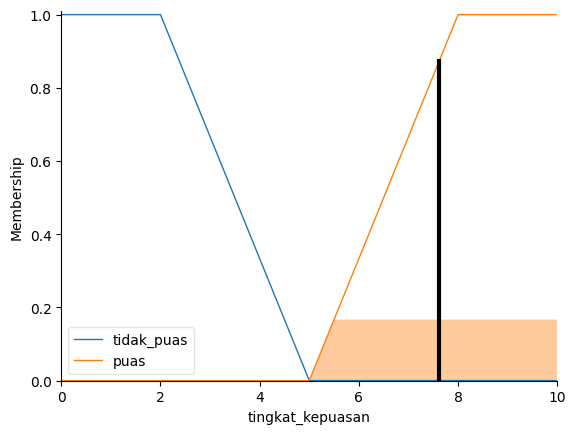

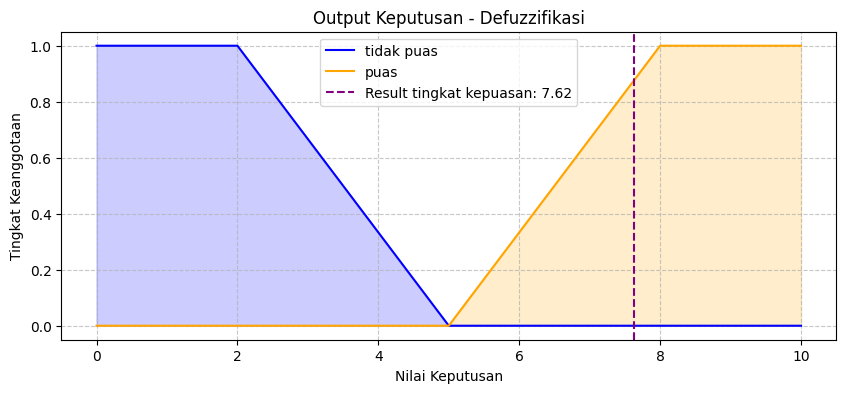

Keputusan akhir: 7.62


In [3]:
# @title 2. Buatlah Code Program Fuzzy Mamdani pada suatu kasus yang ditetapkan. Judul: Analisis Algoritma Fuzzy Mamdani Dalam Mengukur Tingkat Kepuasan Pelanggan Berdasarkan Kualitas Makanan Pelayanan Dan Harga
# Import pustaka numpy untuk operasi numerik
import numpy as np
# Import pustaka skfuzzy untuk fungsi logika fuzzy
import skfuzzy as fuzz
# Import modul kontrol dari skfuzzy sebagai ctrl untuk membangun sistem kontrol fuzzy
from skfuzzy import control as ctrl
# Import matplotlib untuk plotting (opsional, jika ingin menampilkan hasil)
import matplotlib.pyplot as plt

# Mendefinisikan 'kualitas_makanan' sebagai antecedent (input) dengan nilai antara 0 hingga 10, dengan langkah 1
kualitas_makanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_makanan')
# Mendefinisikan 'kualitas_pelayanan' sebagai antecedent (input) dengan nilai antara 0 hingga 10, dengan langkah 1
kualitas_pelayanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_pelayanan')
# Mendefinisikan 'kualitas_harga' sebagai antecedent (input) dengan nilai antara 0 hingga 10, dengan langkah 1
kualitas_harga = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_harga')
# Mendefinisikan 'tingkat_kepuasan' sebagai consequent (output) dengan nilai antara 0 hingga 10, dengan langkah 1
tingkat_kepuasan = ctrl.Consequent(np.arange(0, 11, 1), 'tingkat_kepuasan')

# Mendefinisikan fungsi keanggotaan
kualitas_makanan['tidak_baik'] = fuzz.trapmf(kualitas_makanan.universe, [0, 0, 2, 5])
kualitas_makanan['baik'] = fuzz.trapmf(kualitas_makanan.universe, [5, 8, 10, 10])

# Mendefinisikan fungsi keanggotaan
kualitas_pelayanan['tidak_baik'] = fuzz.trapmf(kualitas_pelayanan.universe, [0, 0, 2, 5])
kualitas_pelayanan['baik'] = fuzz.trapmf(kualitas_pelayanan.universe, [5, 8, 10, 10])

# Mendefinisikan fungsi keanggotaan
kualitas_harga['murah'] = fuzz.trapmf(kualitas_harga.universe, [0, 0, 2, 5])
kualitas_harga['mahal'] = fuzz.trapmf(kualitas_harga.universe, [5, 8, 10, 10])

# Mendefinisikan fungsi keanggotaan
tingkat_kepuasan['tidak_puas'] = fuzz.trapmf(tingkat_kepuasan.universe, [0, 0, 2, 5])
tingkat_kepuasan['puas'] = fuzz.trapmf(tingkat_kepuasan.universe, [5, 8, 10, 10])

# Aturan 1-8: Kualitas Makanan Tidak Baik
rule1 = ctrl.Rule(kualitas_makanan['tidak_baik'] & kualitas_pelayanan['tidak_baik'] & kualitas_harga['mahal'], tingkat_kepuasan['tidak_puas'])
rule2 = ctrl.Rule(kualitas_makanan['tidak_baik'] & kualitas_pelayanan['tidak_baik'] & kualitas_harga['murah'], tingkat_kepuasan['tidak_puas'])
rule3 = ctrl.Rule(kualitas_makanan['tidak_baik'] & kualitas_pelayanan['baik'] & kualitas_harga['mahal'], tingkat_kepuasan['tidak_puas'])
rule4 = ctrl.Rule(kualitas_makanan['tidak_baik'] & kualitas_pelayanan['baik'] & kualitas_harga['murah'], tingkat_kepuasan['puas'])
# Aturan 5-8: Kualitas Makanan Baik, Pelayanan Baik
rule5 = ctrl.Rule(kualitas_makanan['baik'] & kualitas_pelayanan['baik'] & kualitas_harga['mahal'], tingkat_kepuasan['puas'])
rule6 = ctrl.Rule(kualitas_makanan['baik'] & kualitas_pelayanan['baik'] & kualitas_harga['murah'], tingkat_kepuasan['puas'])
# Aturan 7-8: Kualitas Makanan dan Pelayanan tidak Baik, Harga Murah atau Mahal
rule7 = ctrl.Rule(kualitas_makanan['baik'] & kualitas_pelayanan['tidak_baik'] & kualitas_harga['murah'], tingkat_kepuasan['puas'])
rule8 = ctrl.Rule(kualitas_makanan['baik'] & kualitas_pelayanan['tidak_baik'] & kualitas_harga['mahal'], tingkat_kepuasan['tidak_puas'])

# Membuat sistem kontrol dengan aturan yang telah ditentukan
investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
# Membuat lingkungan simulasi untuk sistem kontrol
investment_tingkat_kepuasan = ctrl.ControlSystemSimulation(investment_ctrl)

# Meminta user untuk memasukkan nilai
input_kualitas_makanan = float(input("Masukkan nilai kualitas makanan (0-10): "))
# Meminta user untuk memasukkan nilai
input_kualitas_pelayanan = float(input("Masukkan nilai kualitas pelayanan (0-10): "))
input_kualitas_harga = float(input("Masukkan nilai kualitas harga (0-10): "))
# Menetapkan nilai input
investment_tingkat_kepuasan.input['kualitas_makanan'] = input_kualitas_makanan
investment_tingkat_kepuasan.input['kualitas_pelayanan'] = input_kualitas_pelayanan
investment_tingkat_kepuasan.input['kualitas_harga'] = input_kualitas_harga

# Menghitung keputusan berdasarkan nilai input dan aturan sistem kontrol
investment_tingkat_kepuasan.compute()

# Mengatur plot dengan ukuran gambar 10x4
plt.figure(figsize=(10, 4))
# Plot fungsi keanggotaan
plt.plot(kualitas_makanan.universe, kualitas_makanan['tidak_baik'].mf, label='tidak baik', color='blue')
plt.plot(kualitas_makanan.universe, kualitas_makanan['baik'].mf, label='baik', color='orange')
# Membuat garis vertikal pada input
plt.axvline(input_kualitas_makanan, color='purple', linestyle='--', label=f"kualitas makanan Input: {input_kualitas_makanan}")
# Mengatur judul plot dan label
plt.title("Fungsi Keanggotaan kualitas makanan")
plt.xlabel("Nilai kualitas makanan")
plt.ylabel("Tingkat Keanggotaan")
# Menambahkan legenda agar lebih jelas
plt.legend()
# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.7)
# Menampilkan plot
plt.show()

# Menampilkan gambar, plot
plt.figure(figsize=(10, 4))
plt.plot(kualitas_pelayanan.universe, kualitas_pelayanan['tidak_baik'].mf, label='tidak baik', color='blue')
plt.plot(kualitas_pelayanan.universe, kualitas_pelayanan['baik'].mf, label='baik', color='orange')
# Membuat garis vertikal
plt.axvline(input_kualitas_pelayanan, color='purple', linestyle='--', label=f"kualitas pelayanan Input: {input_kualitas_pelayanan}")
# Membuat judul serta label pada x dan y
plt.title("Input kualitas pelayanan")
plt.xlabel("kualitas pelayanan Value")
plt.ylabel("Membership Degree")
# Menammpilkan legenda
plt.legend()
# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.7)
# Menampilkan plot
plt.show()

# Menampilkan gambar, plot
plt.figure(figsize=(10, 4))
plt.plot(kualitas_harga.universe, kualitas_harga['murah'].mf, label='murah', color='blue')
plt.plot(kualitas_harga.universe, kualitas_harga['mahal'].mf, label='mahal', color='orange')
# Membuat garis vertikal
plt.axvline(input_kualitas_harga, color='purple', linestyle='--', label=f"kualitas harga Input: {input_kualitas_harga}")
# Membuat judul serta label pada x dan y
plt.title("Input kualitas harga")
plt.xlabel("kualitas harga Value")
plt.ylabel("Membership Degree")
# Menammpilkan legenda
plt.legend()
# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.7)
# Menampilkan plot
plt.show()

# Untuk menghitung derajat
kualitas_makanan_activation_tidak_baik = fuzz.interp_membership(kualitas_makanan.universe, kualitas_makanan['tidak_baik'].mf, input_kualitas_makanan)
kualitas_makanan_activation_baik = fuzz.interp_membership(kualitas_makanan.universe, kualitas_makanan['baik'].mf, input_kualitas_makanan)

# Untuk menghitung derajat
kualitas_pelayanan_activation_tidak_baik = fuzz.interp_membership(kualitas_pelayanan.universe, kualitas_pelayanan['tidak_baik'].mf, input_kualitas_pelayanan)
kualitas_pelayanan_activation_baik = fuzz.interp_membership(kualitas_pelayanan.universe, kualitas_pelayanan['baik'].mf, input_kualitas_pelayanan)

kualitas_harga_activation_mahal = fuzz.interp_membership(kualitas_harga.universe, kualitas_harga['mahal'].mf, input_kualitas_harga)
kualitas_harga_activation_murah = fuzz.interp_membership(kualitas_harga.universe, kualitas_harga['murah'].mf, input_kualitas_harga)

# Menampilkan hasil fuzzifikasi
print(f"Fuzzifikasi kualitas makanan: {kualitas_makanan_activation_tidak_baik:.2f}, {kualitas_makanan_activation_baik:.2f}")
print(f"Fuzzifikasi kualitas pelayanan: {kualitas_pelayanan_activation_tidak_baik:.2f}, {kualitas_pelayanan_activation_tidak_baik:.2f}")
print(f"Fuzzifikasi kualitas harga: {kualitas_harga_activation_mahal:.2f}, {kualitas_harga_activation_murah:.2f}")

for i, rule in enumerate(investment_ctrl.rules, 1):
    print(f"Aturan {i}: IF Profit is {rule.antecedent} THEN Devision is {rule.consequent}")

# Menampilkan hasil keputusan pada grafik berdasarkan sistem kontrol fuzzy
tingkat_kepuasan.view(sim=investment_tingkat_kepuasan)
plt.show()

# Mengambil output hasil keputusan dari simulasi kontrol
result = investment_tingkat_kepuasan.output['tingkat_kepuasan']
# Mengatur ukuran plot
plt.figure(figsize=(10, 4))
# Plot fungsi keanggotaan
plt.plot(tingkat_kepuasan.universe, tingkat_kepuasan['tidak_puas'].mf, label='tidak puas', color='blue')
plt.plot(tingkat_kepuasan.universe, tingkat_kepuasan['puas'].mf, label='puas', color='orange')
# Membuat keputusan dengan garis vertikal berwarna ungu
plt.axvline(x=result, color='purple', linestyle='--', label=f"Result tingkat kepuasan: {result:.2f}")
# Menambahkan area isian untuk visualisasi setiap tingkat keputusan dengan transparansi 0.2
plt.fill_between(tingkat_kepuasan.universe, 0, tingkat_kepuasan['tidak_puas'].mf, color='blue', alpha=0.2)
plt.fill_between(tingkat_kepuasan.universe, 0, tingkat_kepuasan['puas'].mf, color='orange', alpha=0.2)
# Mengatur judul plot dan label untuk sumbu x dan y
plt.title("Output Keputusan - Defuzzifikasi")
plt.xlabel("Nilai Keputusan")
plt.ylabel("Tingkat Keanggotaan")
# Menambahkan legenda untuk kejelasan
plt.legend()
# Menampilkan grid dengan gaya garis putus-putus dan transparansi
plt.grid(True, linestyle='--', alpha=0.7)
# Menampilkan plot
plt.show()

# Mencetak hasil keputusan akhir investasi dengan format dua desimal
print(f"Keputusan akhir: {result:.2f}")

Referensi : https://drive.google.com/file/d/1OY70oPfWX2HFmSm9EZHrZepdOoTuW-Si/view?usp=sharing